In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pickle
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
df = pd.read_csv('./data/weblogs.csv')
df.head()

,ID,NUMBER_OF_REQUESTS,TOTAL_DURATION,AVERAGE_TIME,STANDARD_DEVIATION,REPEATED_REQUESTS,HTTP_RESPONSE_2XX,HTTP_RESPONSE_3XX,HTTP_RESPONSE_4XX,HTTP_RESPONSE_5XX,...,DEPTH,STD_DEPTH,CONSECUTIVE,DATA,PPI,SF_REFERRER,SF_FILETYPE,MAX_BARRAGE,PENALTY,ROBOT
0,obSnwGoBCue8G08E_WCX,79,592,7.589744,1.800540,0.000000,0.873418,0.126582,0.000000,0.000000,...,4.0,0.494041,0.101266,1555089.0,2.718334e+07,0.000000,0.205128,1,0,1
1,nLSnwGoBCue8G08E_WCX,350,103621,296.908300,260.332670,0.000000,0.997143,0.000000,0.002857,0.000000,...,6.0,0.341303,0.425714,2071344.0,1.427714e+01,0.547278,0.461318,4,0,1
2,ErSowGoBCue8G08ECmHa,15,368,26.285715,87.329780,0.000000,1.000000,0.000000,0.000000,0.000000,...,3.0,0.000000,0.000000,49505.0,1.413333e+01,0.642857,1.000000,2,0,0
3,E7SowGoBCue8G08ECmHa,28,11,0.407407,1.097447,0.000000,1.000000,0.000000,0.000000,0.000000,...,3.0,0.000000,0.821429,45984.0,1.332143e+01,0.037037,0.148148,5,0,0
4,FbSowGoBCue8G08ECmHa,9342,80946,8.665668,17.566462,0.000107,0.996896,0.002569,0.000214,0.000321,...,4.0,0.152943,0.953757,83171793.0,1.307407e+01,0.000000,0.023552,1,0,1


ID droppen

In [4]:
df = df.drop(['ID'], axis=1)

Opsplitsen in X en y

In [5]:
X = df.drop(['ROBOT'], axis=1)
y = df['ROBOT']

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67352 entries, 0 to 67351
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NUMBER_OF_REQUESTS  67352 non-null  int64  
 1   TOTAL_DURATION      67352 non-null  int64  
 2   AVERAGE_TIME        67352 non-null  float64
 3   STANDARD_DEVIATION  52945 non-null  float64
 4   REPEATED_REQUESTS   67352 non-null  float64
 5   HTTP_RESPONSE_2XX   67352 non-null  float64
 6   HTTP_RESPONSE_3XX   67352 non-null  float64
 7   HTTP_RESPONSE_4XX   67352 non-null  float64
 8   HTTP_RESPONSE_5XX   67352 non-null  float64
 9   GET_METHOD          67352 non-null  float64
 10  POST_METHOD         67352 non-null  float64
 11  HEAD_METHOD         67352 non-null  float64
 12  OTHER_METHOD        67352 non-null  float64
 13  NIGHT               67352 non-null  float64
 14  UNASSIGNED          67352 non-null  float64
 15  IMAGES              67352 non-null  float64
 16  TOTA

STANDARD_DEVIATION,  SF_FILETYPE en SF_REFERRER --> hebben NaN waarden

Opvullen met 0, opvullen met mean() of weglaten

### Opvullen met 0
en vergelijken met std()

In [7]:
X.std()

NUMBER_OF_REQUESTS    1.704055e+02
TOTAL_DURATION        8.037288e+03
AVERAGE_TIME          1.509743e+02
STANDARD_DEVIATION    8.988634e+01
REPEATED_REQUESTS     7.927613e-02
HTTP_RESPONSE_2XX     1.119441e-01
HTTP_RESPONSE_3XX     5.831336e-02
HTTP_RESPONSE_4XX     9.247594e-02
HTTP_RESPONSE_5XX     2.623111e-02
GET_METHOD            5.458825e-02
POST_METHOD           3.179709e-02
HEAD_METHOD           4.393626e-02
OTHER_METHOD          7.723733e-03
NIGHT                 2.547399e-01
UNASSIGNED            4.237582e-01
IMAGES                3.054074e-01
TOTAL_HTML            3.512502e-01
HTML_TO_IMAGE         5.067831e+00
HTML_TO_CSS           1.671526e+00
HTML_TO_JS            2.688560e+00
WIDTH                 1.483404e+02
DEPTH                 1.491212e+00
STD_DEPTH             5.986306e-01
CONSECUTIVE           2.802233e-01
DATA                  1.937276e+06
PPI                   4.307353e+07
SF_REFERRER           2.435843e-01
SF_FILETYPE           2.488430e-01
MAX_BARRAGE         

In [8]:
X_zero = X.copy()
X_zero = X.fillna(0)
X_zero.std()

NUMBER_OF_REQUESTS    1.704055e+02
TOTAL_DURATION        8.037288e+03
AVERAGE_TIME          1.509743e+02
STANDARD_DEVIATION    8.139176e+01
REPEATED_REQUESTS     7.927613e-02
HTTP_RESPONSE_2XX     1.119441e-01
HTTP_RESPONSE_3XX     5.831336e-02
HTTP_RESPONSE_4XX     9.247594e-02
HTTP_RESPONSE_5XX     2.623111e-02
GET_METHOD            5.458825e-02
POST_METHOD           3.179709e-02
HEAD_METHOD           4.393626e-02
OTHER_METHOD          7.723733e-03
NIGHT                 2.547399e-01
UNASSIGNED            4.237582e-01
IMAGES                3.054074e-01
TOTAL_HTML            3.512502e-01
HTML_TO_IMAGE         5.067831e+00
HTML_TO_CSS           1.671526e+00
HTML_TO_JS            2.688560e+00
WIDTH                 1.483404e+02
DEPTH                 1.491212e+00
STD_DEPTH             5.986306e-01
CONSECUTIVE           2.802233e-01
DATA                  1.937276e+06
PPI                   4.307353e+07
SF_REFERRER           2.410086e-01
SF_FILETYPE           2.713591e-01
MAX_BARRAGE         

Bij STANDARD_DEVIATION is er bijna een verschil van 1.0 bij de std()

Bij SF_REFERRER is er maar een verschil van ongv. 0.025

Bij SF_FILETYPE zien we een verschil van ongv. 0.225

Dit lijkt mij een te grote afwijking --> fillna(X.mean()) testen

### Opvullen met mean()

In [9]:
X_mean = X.copy()
X_mean = X.fillna(X.mean())
X.std()

NUMBER_OF_REQUESTS    1.704055e+02
TOTAL_DURATION        8.037288e+03
AVERAGE_TIME          1.509743e+02
STANDARD_DEVIATION    8.988634e+01
REPEATED_REQUESTS     7.927613e-02
HTTP_RESPONSE_2XX     1.119441e-01
HTTP_RESPONSE_3XX     5.831336e-02
HTTP_RESPONSE_4XX     9.247594e-02
HTTP_RESPONSE_5XX     2.623111e-02
GET_METHOD            5.458825e-02
POST_METHOD           3.179709e-02
HEAD_METHOD           4.393626e-02
OTHER_METHOD          7.723733e-03
NIGHT                 2.547399e-01
UNASSIGNED            4.237582e-01
IMAGES                3.054074e-01
TOTAL_HTML            3.512502e-01
HTML_TO_IMAGE         5.067831e+00
HTML_TO_CSS           1.671526e+00
HTML_TO_JS            2.688560e+00
WIDTH                 1.483404e+02
DEPTH                 1.491212e+00
STD_DEPTH             5.986306e-01
CONSECUTIVE           2.802233e-01
DATA                  1.937276e+06
PPI                   4.307353e+07
SF_REFERRER           2.435843e-01
SF_FILETYPE           2.488430e-01
MAX_BARRAGE         

Hier zien we nog een grotere afwijking --> Features met Nan-Values droppen

### Features met Nan-values droppen

In [10]:
X_drop = X.copy()
X_drop = X.drop(['STANDARD_DEVIATION', 'SF_REFERRER', 'SF_FILETYPE'], axis=1)

### Train en test opsplitsen voor alle soorten X (zero, mean, drop)

In [11]:
X_zero_train, X_zero_test, y_train, y_test = train_test_split(X_zero, y, test_size=0.2, random_state=42)

print(X_zero_train.shape, X_zero_test.shape, y_train.shape, y_test.shape)

(53881, 30) (13471, 30) (53881,) (13471,)


In [12]:
X_mean_train, X_mean_test, y_train, y_test = train_test_split(X_mean, y, test_size=0.2, random_state=42)

print(X_mean_train.shape, X_mean_test.shape, y_train.shape, y_test.shape)

(53881, 30) (13471, 30) (53881,) (13471,)


In [13]:
X_drop_train, X_drop_test, y_train, y_test = train_test_split(X_drop, y, test_size=0.2, random_state=42)

print(X_drop_train.shape, X_drop_test.shape, y_train.shape, y_test.shape)

(53881, 27) (13471, 27) (53881,) (13471,)


# DecisionTreeClassifier trainen en testen

#### DecisionTreeClassifier best estimator zoeken met grid search cv

##### X_zero

In [14]:
grid_search_zero = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid={'max_depth': np.arange(2, 31)}, cv=5, scoring='accuracy', return_train_score=True)

grid_search_zero.fit(X_zero_train, y_train)

print(grid_search_zero.best_params_)
print("\n")

y_pred_0 = grid_search_zero.predict(X_zero_test)

print(accuracy_score(y_test, y_pred_0))
print("\n")

print(classification_report(y_test, y_pred_0))
print("\n")

cm_0 = confusion_matrix(y_test, y_pred_0)

print(cm_0)
print("\n")

{'max_depth': 17}


0.9757998663796303


              precision    recall  f1-score   support

           0       0.99      0.98      0.98     10785
           1       0.93      0.95      0.94      2686

    accuracy                           0.98     13471
   macro avg       0.96      0.96      0.96     13471
weighted avg       0.98      0.98      0.98     13471



[[10603   182]
 [  144  2542]]




##### X_mean

In [15]:
grid_search_mean = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid={'max_depth': np.arange(2, 31)}, cv=5, scoring='accuracy', return_train_score=True)

grid_search_mean.fit(X_mean_train, y_train)

print(grid_search_mean.best_params_)
print("\n")

y_pred_mean = grid_search_mean.predict(X_mean_test)

print(accuracy_score(y_test, y_pred_mean))
print("\n")

print(classification_report(y_test, y_pred_mean))
print("\n")

cm_mean = confusion_matrix(y_test, y_pred_mean)

print(cm_mean)
print("\n")

{'max_depth': 16}


0.9758740999183431


              precision    recall  f1-score   support

           0       0.99      0.98      0.98     10785
           1       0.93      0.95      0.94      2686

    accuracy                           0.98     13471
   macro avg       0.96      0.97      0.96     13471
weighted avg       0.98      0.98      0.98     13471



[[10602   183]
 [  142  2544]]




##### X_drop

In [16]:
grid_search_drop = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid={'max_depth': np.arange(2, 31)}, cv=5, scoring='accuracy', return_train_score=True)

grid_search_drop.fit(X_drop_train, y_train)

print(grid_search_drop.best_params_)
print("\n")

y_pred_drop = grid_search_drop.predict(X_drop_test)

print(accuracy_score(y_test, y_pred_drop))
print("\n")

print(classification_report(y_test, y_pred_drop))
print("\n")

cm_drop = confusion_matrix(y_test, y_pred_drop)

print(cm_drop)
print("\n")

{'max_depth': 16}


0.9746863632989384


              precision    recall  f1-score   support

           0       0.99      0.98      0.98     10785
           1       0.93      0.95      0.94      2686

    accuracy                           0.97     13471
   macro avg       0.96      0.96      0.96     13471
weighted avg       0.97      0.97      0.97     13471



[[10586   199]
 [  142  2544]]




Geen groot verschil tussen de 3 verschillende X'en

### Feature Importance bekijken

In [17]:
features_0 = X_zero.columns

dt_clf_0 = DecisionTreeClassifier(random_state=42, max_depth=17)
dt_clf_0.fit(X_zero_train, y_train)

importances_0 = dt_clf_0.feature_importances_

df_importances_0 = pd.DataFrame({'feature': features_0, 'importance': importances_0})
df_importances_0 = df_importances_0.sort_values(by='importance', ascending=False)
df_importances_0

,feature,importance
14,UNASSIGNED,0.708889
24,DATA,0.079816
25,PPI,0.039659
29,PENALTY,0.036231
19,HTML_TO_JS,0.025675
5,HTTP_RESPONSE_2XX,0.021724
16,TOTAL_HTML,0.014489
21,DEPTH,0.011178
2,AVERAGE_TIME,0.011107
1,TOTAL_DURATION,0.010479


In [18]:
features_m = X_mean.columns

dt_clf_m = DecisionTreeClassifier(random_state=42)
dt_clf_m.fit(X_mean_train, y_train)

importances_m = dt_clf_m.feature_importances_

df_importances_m = pd.DataFrame({'feature': features_m, 'importance': importances_m})
df_importances_m = df_importances_m.sort_values(by='importance', ascending=False)
df_importances_m

,feature,importance
14,UNASSIGNED,0.689238
24,DATA,0.102251
25,PPI,0.037362
29,PENALTY,0.034911
19,HTML_TO_JS,0.025185
5,HTTP_RESPONSE_2XX,0.021008
16,TOTAL_HTML,0.015312
2,AVERAGE_TIME,0.011253
1,TOTAL_DURATION,0.010714
21,DEPTH,0.009752


In [19]:
features_d = X_drop.columns

dt_clf_d = DecisionTreeClassifier(random_state=42)
dt_clf_d.fit(X_drop_train, y_train)

importances_d = dt_clf_d.feature_importances_

df_importances_d = pd.DataFrame({'feature': features_d, 'importance': importances_d})
df_importances_d = df_importances_d.sort_values(by='importance', ascending=False)
df_importances_d

,feature,importance
13,UNASSIGNED,0.689621
23,DATA,0.101442
24,PPI,0.040127
26,PENALTY,0.035166
18,HTML_TO_JS,0.025523
4,HTTP_RESPONSE_2XX,0.020888
15,TOTAL_HTML,0.014310
20,DEPTH,0.013898
2,AVERAGE_TIME,0.013036
1,TOTAL_DURATION,0.011308


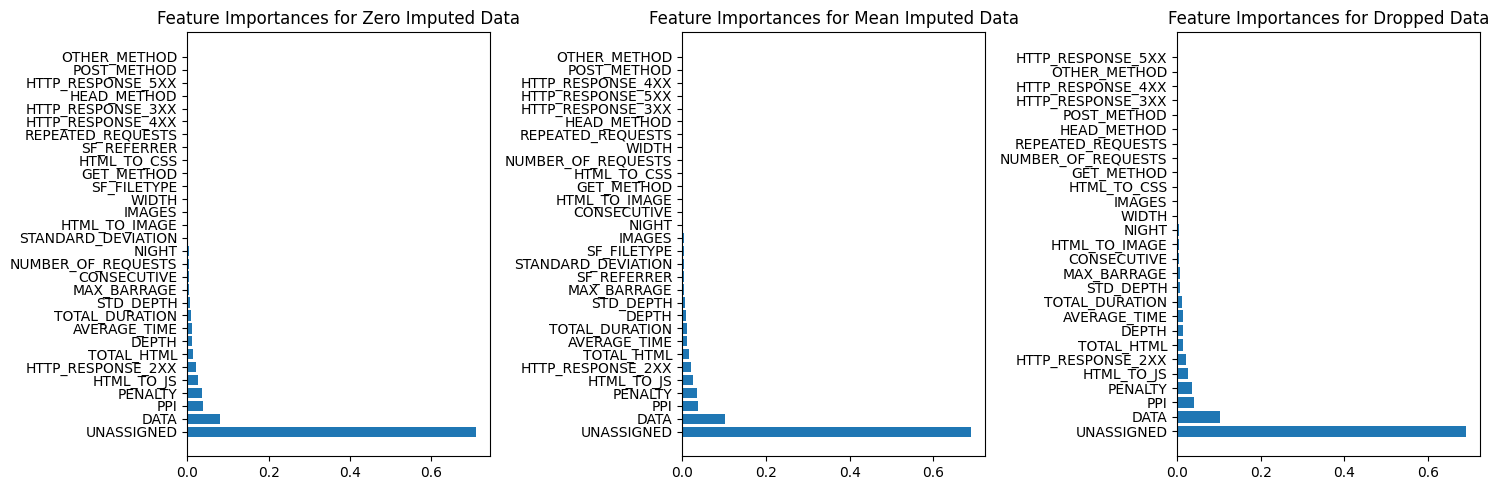

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].barh(df_importances_0['feature'], df_importances_0['importance'])
ax[0].set_title('Feature Importances for Zero Imputed Data')

ax[1].barh(df_importances_m['feature'], df_importances_m['importance'])
ax[1].set_title('Feature Importances for Mean Imputed Data')

ax[2].barh(df_importances_d['feature'], df_importances_d['importance'])
ax[2].set_title('Feature Importances for Dropped Data')

plt.tight_layout()
plt.show()

Duidelijk dat OTHER_METHOD, POST_METHOD, HEAD_METHOD, HTTP_RESPONSE(3,4,5)XX en REPEATED_REQUESTS geen importance hebben --> droppen

In [21]:
X_zero = X.copy()
X_zero = X_zero.fillna(0)
X_zero = X_zero.drop(['OTHER_METHOD', 'POST_METHOD', 'HEAD_METHOD', 'HTTP_RESPONSE_3XX',  'HTTP_RESPONSE_4XX', 'HTTP_RESPONSE_5XX','REPEATED_REQUESTS'], axis=1)

X_mean = X.copy()
X_mean = X_mean.fillna(0)
X_mean = X_mean.drop(['OTHER_METHOD', 'POST_METHOD', 'HEAD_METHOD', 'HTTP_RESPONSE_3XX',  'HTTP_RESPONSE_4XX', 'HTTP_RESPONSE_5XX','REPEATED_REQUESTS'], axis=1)

X_drop = X.copy()
X_drop = X.drop(['STANDARD_DEVIATION', 'SF_REFERRER', 'SF_FILETYPE', 'OTHER_METHOD', 'POST_METHOD', 'HEAD_METHOD', 'HTTP_RESPONSE_3XX',  'HTTP_RESPONSE_4XX', 'HTTP_RESPONSE_5XX','REPEATED_REQUESTS'], axis=1)

### Accuracy, confusion matrix en classification report vergelijken na het droppen

In [22]:
X_zero_train, X_zero_test, y_train, y_test = train_test_split(X_zero, y, test_size=0.2, random_state=42)

print(X_zero_train.shape, X_zero_test.shape, y_train.shape, y_test.shape)

(53881, 23) (13471, 23) (53881,) (13471,)


In [23]:
X_mean_train, X_mean_test, y_train, y_test = train_test_split(X_mean, y, test_size=0.2, random_state=42)

print(X_mean_train.shape, X_mean_test.shape, y_train.shape, y_test.shape)

(53881, 23) (13471, 23) (53881,) (13471,)


In [24]:
X_drop_train, X_drop_test, y_train, y_test = train_test_split(X_drop, y, test_size=0.2, random_state=42)

print(X_drop_train.shape, X_drop_test.shape, y_train.shape, y_test.shape)

(53881, 20) (13471, 20) (53881,) (13471,)


### X zero

{'max_depth': 16}


0.9758740999183431


              precision    recall  f1-score   support

           0       0.99      0.98      0.98     10785
           1       0.93      0.95      0.94      2686

    accuracy                           0.98     13471
   macro avg       0.96      0.97      0.96     13471
weighted avg       0.98      0.98      0.98     13471





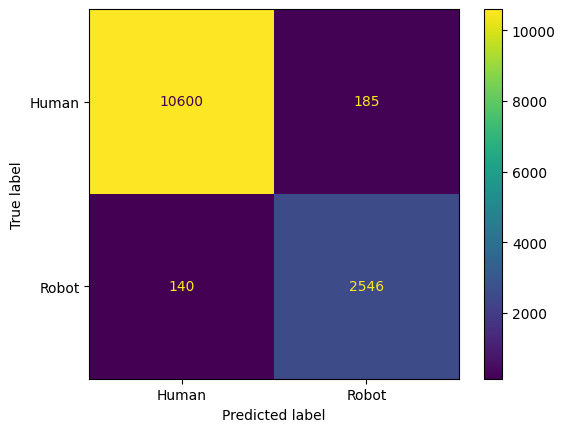

In [25]:
grid_search_zero = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid={'max_depth': np.arange(2, 31)}, cv=5, scoring='accuracy', return_train_score=True)

grid_search_zero.fit(X_zero_train, y_train)

print(grid_search_zero.best_params_)
print("\n")

y_pred_0 = grid_search_zero.predict(X_zero_test)

print(accuracy_score(y_test, y_pred_0))
print("\n")

print(classification_report(y_test, y_pred_0))
print("\n")

cm_0 = confusion_matrix(y_test, y_pred_0)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_0, display_labels=['Human', 'Robot'])
disp.plot()

### X mean

{'max_depth': 16}


0.9758740999183431


              precision    recall  f1-score   support

           0       0.99      0.98      0.98     10785
           1       0.93      0.95      0.94      2686

    accuracy                           0.98     13471
   macro avg       0.96      0.97      0.96     13471
weighted avg       0.98      0.98      0.98     13471





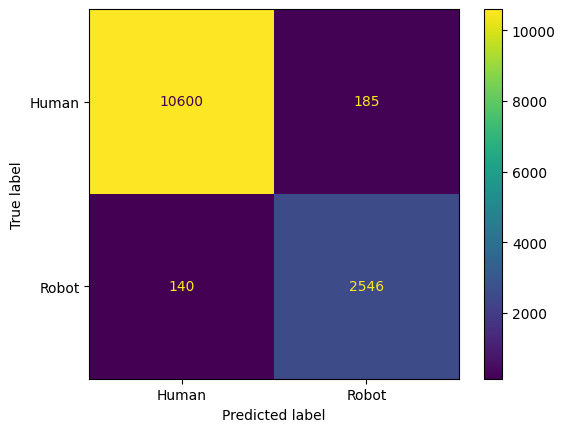

In [26]:
grid_search_mean = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid={'max_depth': np.arange(2, 31)}, cv=5, scoring='accuracy', return_train_score=True)

grid_search_mean.fit(X_mean_train, y_train)

print(grid_search_mean.best_params_)
print("\n")

y_pred_mean = grid_search_mean.predict(X_mean_test)

print(accuracy_score(y_test, y_pred_mean))
print("\n")

print(classification_report(y_test, y_pred_mean))
print("\n")

cm_mean = confusion_matrix(y_test, y_pred_mean)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_mean, display_labels=['Human', 'Robot'])
disp.plot()

### X drop

{'max_depth': 18}


0.9753544651473536


              precision    recall  f1-score   support

           0       0.99      0.98      0.98     10785
           1       0.93      0.95      0.94      2686

    accuracy                           0.98     13471
   macro avg       0.96      0.96      0.96     13471
weighted avg       0.98      0.98      0.98     13471





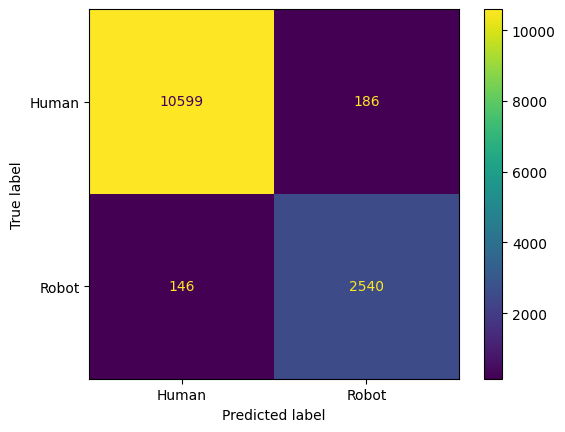

In [27]:
grid_search_drop = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid={'max_depth': np.arange(2, 31)}, cv=5, scoring='accuracy', return_train_score=True)

grid_search_drop.fit(X_drop_train, y_train)

print(grid_search_drop.best_params_)
print("\n")

y_pred_drop = grid_search_drop.predict(X_drop_test)

print(accuracy_score(y_test, y_pred_drop))
print("\n")

print(classification_report(y_test, y_pred_drop))
print("\n")

cm_drop = confusion_matrix(y_test, y_pred_drop)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_drop, display_labels=['Human', 'Robot'])
disp.plot()

Aangezien de verschillen zeer minimaal zijn tussen de X_zero, X_mean en X_drop resultaten en de STD() te veel afwijkten bij de X_zero en X_meam ga ik de X_drop gebruiken. Ook bij de Feature importance kan er gezien worden dat STANDARD_DEVIATION, SF_REFERRER EN SF_FILETYPE nauwelijks impact (importance) hebben

## DecisionTreeClassifier resultaten vergelijken met BaggingClassifier (Met en zonder OOB), met AdaBoostClassifier, GradientBoostClassifier en RandomForestClassifier

De ranges van de waarden bij de features verschillen soms erg veel (De number of request bvb kan oplopen tot een nummer groter dan 9000 terwijl er bij de HTTP_REQUEST soms getallen van 0.3 zijn) --> testen of de models betere resultaten geven wanneer features gescaled zijn

In [28]:
df = pd.read_csv('./data/weblogs.csv')

df = df.drop(['ID', 'STANDARD_DEVIATION', 'SF_REFERRER', 'SF_FILETYPE', 'OTHER_METHOD', 'POST_METHOD', 'HEAD_METHOD', 'HTTP_RESPONSE_3XX',  'HTTP_RESPONSE_4XX', 'HTTP_RESPONSE_5XX','REPEATED_REQUESTS'], axis=1)
X = df.drop(['ROBOT'], axis=1)
y = df['ROBOT']

corr_matrix = df.corr()
corr_matrix['ROBOT'].sort_values(ascending=True)

DEPTH                -0.427654
STD_DEPTH            -0.396970
MAX_BARRAGE          -0.364920
CONSECUTIVE          -0.344941
HTML_TO_IMAGE        -0.303528
HTML_TO_JS           -0.245619
HTML_TO_CSS          -0.214941
PENALTY              -0.124917
WIDTH                -0.089059
NUMBER_OF_REQUESTS   -0.086990
IMAGES               -0.041017
GET_METHOD           -0.009266
HTTP_RESPONSE_2XX    -0.003817
PPI                   0.051511
TOTAL_DURATION        0.076580
DATA                  0.085689
NIGHT                 0.186689
TOTAL_HTML            0.253633
AVERAGE_TIME          0.255445
UNASSIGNED            0.807035
ROBOT                 1.000000
Name: ROBOT, dtype: float64

We zien dat "HTTP_RESPONSE_2XX" en "GET_METHOD" een zeer lage correlatie hebben met ROBOT --> laten deze vallen

In [29]:
X = X.drop(['HTTP_RESPONSE_2XX', "GET_METHOD"], axis=1)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(53881, 18) (13471, 18) (53881,) (13471,)


### Zonder scaling

##### DecisionTreeClassifier

{'max_depth': 16, 'min_samples_leaf': 2, 'min_samples_split': 2}


0.9738697943730977


              precision    recall  f1-score   support

           0       0.98      0.98      0.98     10785
           1       0.93      0.94      0.93      2686

    accuracy                           0.97     13471
   macro avg       0.96      0.96      0.96     13471
weighted avg       0.97      0.97      0.97     13471



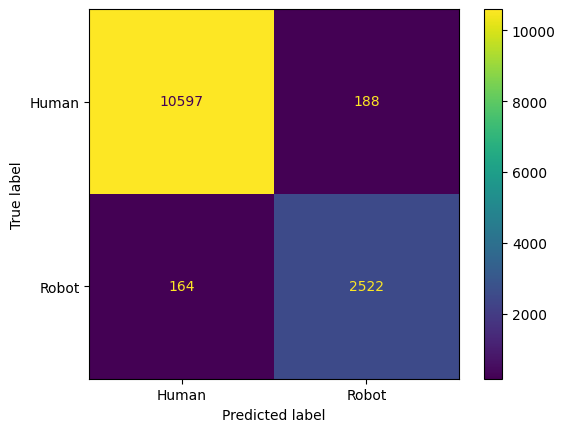

In [31]:
param_grid_dtc = {'max_depth': np.arange(2, 19), 'min_samples_split': np.arange(2, 11, 2), 'min_samples_leaf': np.arange(2, 11, 2)}

grid_search_dtc = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=param_grid_dtc, cv=5, scoring='precision', return_train_score=True)

grid_search_dtc.fit(X_train, y_train)

print(grid_search_dtc.best_params_)
print("\n")

dt_clf = grid_search_dtc.best_estimator_

dt_clf.fit(X_train, y_train)

y_pred_dtc = dt_clf.predict(X_test)

print(accuracy_score(y_test, y_pred_dtc))
print("\n")
print(classification_report(y_test, y_pred_dtc))

cm = confusion_matrix(y_test, y_pred_dtc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Human', 'Robot'])
disp.plot()

##### BaggingClassifier zonder OOB

- n_estimators = 500 --> 500 decision trees getrained op subset vd data
- max_samples = 100 --> elke tree zal op 100 samples v/e random subset worden getrained
- bootstrap = True --> training data samples zullen replaced worden

0.9452898819686735


              precision    recall  f1-score   support

           0       0.98      0.95      0.97     10785
           1       0.83      0.92      0.87      2686

    accuracy                           0.95     13471
   macro avg       0.90      0.94      0.92     13471
weighted avg       0.95      0.95      0.95     13471



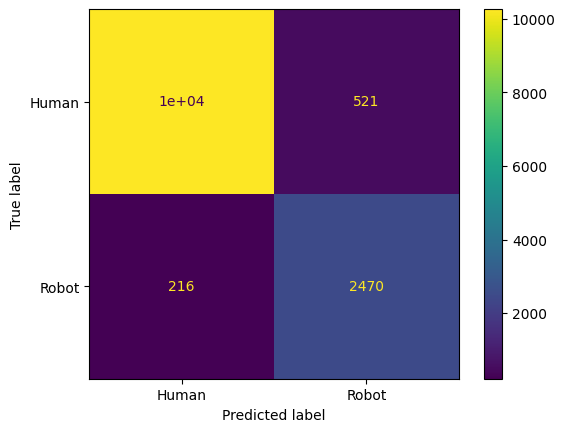

In [32]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)

bag_clf.fit(X_train, y_train)

y_pred_bc = bag_clf.predict(X_test)

print(accuracy_score(y_test, y_pred_bc))
print("\n")
print(classification_report(y_test, y_pred_bc))

cm = confusion_matrix(y_test, y_pred_bc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Human', 'Robot'])
disp.plot()

##### BaggingClassifier met OOB

- oob_score = True --> niet gebruikte data samples voor evaluatie BaggingClassifier

In [33]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap=True, oob_score=True, n_jobs=-1, random_state=42)

bag_clf.fit(X_train, y_train)

bag_clf.oob_score_

0.9482006644271636

In [34]:
y_pred_oob = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred_oob)

0.9452898819686735

Is zeer dicht bij de OOB score

In [35]:
print(classification_report(y_test, y_pred_oob))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97     10785
           1       0.83      0.92      0.87      2686

    accuracy                           0.95     13471
   macro avg       0.90      0.94      0.92     13471
weighted avg       0.95      0.95      0.95     13471



##### AdaBoostClassifier

0.9749832974537896

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     10785
           1       0.94      0.94      0.94      2686

    accuracy                           0.97     13471
   macro avg       0.96      0.96      0.96     13471
weighted avg       0.97      0.97      0.97     13471



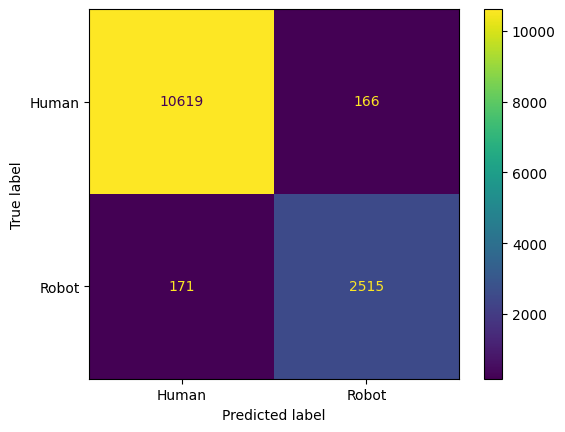

In [36]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

y_pred_ada = ada_clf.predict(X_test)
print(f"{accuracy_score(y_test, y_pred_ada)}\n")

print(classification_report(y_test, y_pred_ada))

cm = confusion_matrix(y_test, y_pred_ada)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Human', 'Robot'])
disp.plot()

##### GradientBoostClassifier

0.9772845371538861

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     10785
           1       0.94      0.95      0.94      2686

    accuracy                           0.98     13471
   macro avg       0.96      0.97      0.96     13471
weighted avg       0.98      0.98      0.98     13471



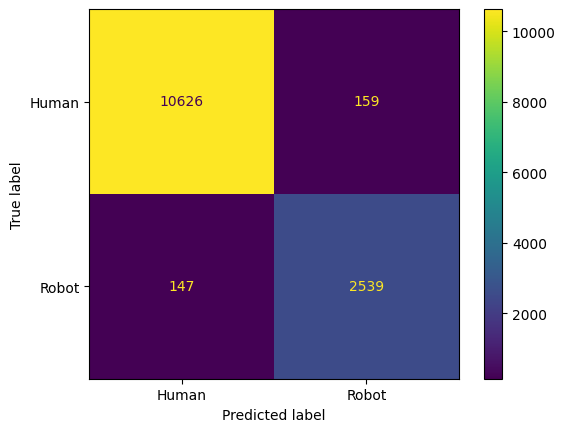

In [37]:
gbrt = GradientBoostingClassifier(max_depth=18, n_estimators=120, learning_rate=0.1, random_state=42)
gbrt.fit(X_train, y_train)

errors_gbrt = [mean_squared_error(y_test, y_pred) for y_pred in gbrt.staged_predict(X_test)]

best_n_estimators = np.argmin(errors_gbrt) + 1

gbrt_best = GradientBoostingClassifier(max_depth=18, n_estimators=best_n_estimators, learning_rate=0.1, random_state=42)
gbrt_best.fit(X_train, y_train)

y_pred_gbrt = gbrt_best.predict(X_test)

print(f"{accuracy_score(y_test, y_pred_gbrt)}\n")

print(classification_report(y_test, y_pred_gbrt))

cm = confusion_matrix(y_test, y_pred_gbrt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Human', 'Robot'])
disp.plot()

##### RandomForestClassifier

{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.9795857768539826

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     10785
           1       0.94      0.95      0.95      2686

    accuracy                           0.98     13471
   macro avg       0.97      0.97      0.97     13471
weighted avg       0.98      0.98      0.98     13471



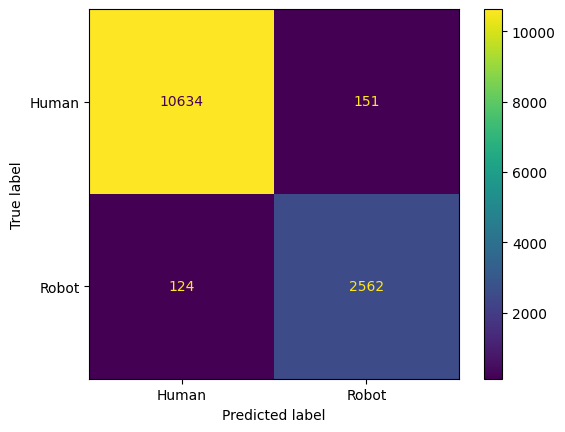

In [38]:
param_grid1 = {
    'n_estimators': [40, 50, 100, 110, 150],
    'max_depth': [1, 5, 10, 15, 20, 25, 30],
    'min_samples_leaf' : [1, 2, 4],
    'min_samples_split' : [2, 5, 10],
}

param_grid2 = {
    'n_estimators': [5, 10, 20, 30, 40, 50, 100],
    'max_depth': [1, 5, 10, 15, 20, 25, 30],
    'min_samples_leaf' : [1, 2, 4],
    'min_samples_split' : [2, 5, 10],
}

param_grid3 = {
    'n_estimators': [1, 2, 5, 10, 20, 25, 30, 35, 40],
    'max_depth': [4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf' : [1, 2, 4],
    'min_samples_split' : [2, 5, 10],
}

grid_search_rfc = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=[param_grid1, param_grid2, param_grid3], cv=5, n_jobs=-1)

grid_search_rfc.fit(X_train, y_train)

print(grid_search_rfc.best_params_)

rf_clf = grid_search_rfc.best_estimator_
rf_clf.fit(X_train, y_train)

y_pred_rfc = rf_clf.predict(X_test)
print(f"{accuracy_score(y_test, y_pred_rfc)}\n")

print(classification_report(y_test, y_pred_rfc))

cm = confusion_matrix(y_test, y_pred_rfc)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Human', 'Robot'])
disp.plot()

### Met Scaling

In [39]:
df = pd.read_csv('./data/weblogs.csv')

X = df.drop(['ROBOT', 'ID', 'STANDARD_DEVIATION', 'SF_REFERRER', 'SF_FILETYPE', 'OTHER_METHOD', 'POST_METHOD', 'HEAD_METHOD', 'HTTP_RESPONSE_3XX',  'HTTP_RESPONSE_4XX', 'HTTP_RESPONSE_5XX','REPEATED_REQUESTS'], axis=1)
y = df['ROBOT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

0.9726820577536931

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     10785
           1       0.93      0.93      0.93      2686

    accuracy                           0.97     13471
   macro avg       0.96      0.96      0.96     13471
weighted avg       0.97      0.97      0.97     13471



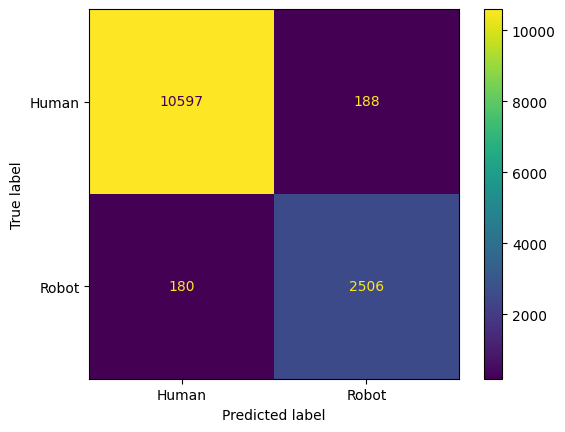

In [40]:
from sklearn.pipeline import Pipeline

scaler = StandardScaler()

dt_clf_scaled = DecisionTreeClassifier(random_state=42)

pipeline = Pipeline([
    ('scaler', scaler),
    ('gs_dt_clf_scaled', GridSearchCV(dt_clf_scaled, param_grid=param_grid_dtc, cv=5, n_jobs=-1)),
])

pipeline.fit(X_train, y_train)

y_pred_pipeline = pipeline.predict(X_test)

print(f"{accuracy_score(y_test, y_pred_pipeline)}\n")

print(classification_report(y_test, y_pred_pipeline))

cm = confusion_matrix(y_test, y_pred_pipeline)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Human', 'Robot'])
disp.plot()

0.9472941875139188

              precision    recall  f1-score   support

           0       0.98      0.95      0.97     10785
           1       0.82      0.94      0.88      2686

    accuracy                           0.95     13471
   macro avg       0.90      0.94      0.92     13471
weighted avg       0.95      0.95      0.95     13471



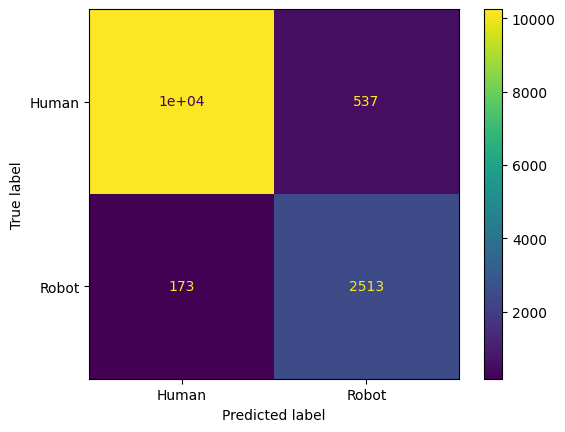

In [41]:
bag_clf_scaled = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)

pipeline = Pipeline([
    ('scaler', scaler),
    ('bag_clf_scaled', bag_clf_scaled),
])

pipeline.fit(X_train, y_train)

y_pred_pipeline = pipeline.predict(X_test)

print(f"{accuracy_score(y_test, y_pred_pipeline)}\n")

print(classification_report(y_test, y_pred_pipeline))

cm = confusion_matrix(y_test, y_pred_pipeline)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Human', 'Robot'])
disp.plot()

0.9472941875139188

              precision    recall  f1-score   support

           0       0.98      0.95      0.97     10785
           1       0.82      0.94      0.88      2686

    accuracy                           0.95     13471
   macro avg       0.90      0.94      0.92     13471
weighted avg       0.95      0.95      0.95     13471



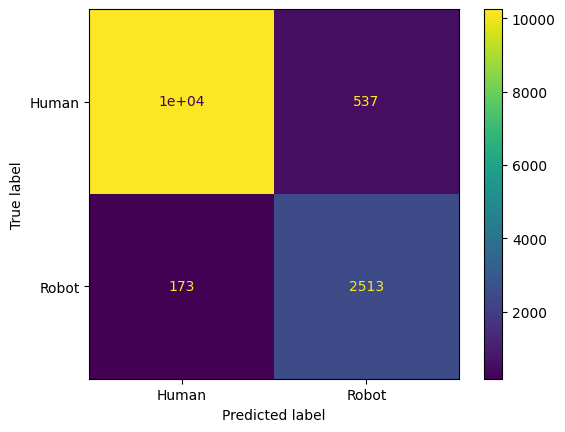

In [42]:
bag_clf_oob_scaled = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap=True, oob_score=True, n_jobs=-1, random_state=42)

pipeline = Pipeline([
    ('scaler', scaler),
    ('bag_clf_oob_scaled', bag_clf_oob_scaled),
])

pipeline.fit(X_train, y_train)

y_pred_pipeline = pipeline.predict(X_test)

print(f"{accuracy_score(y_test, y_pred_pipeline)}\n")

print(classification_report(y_test, y_pred_pipeline))

cm = confusion_matrix(y_test, y_pred_pipeline)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Human', 'Robot'])
disp.plot()

0.9732016925246827

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     10785
           1       0.94      0.93      0.93      2686

    accuracy                           0.97     13471
   macro avg       0.96      0.96      0.96     13471
weighted avg       0.97      0.97      0.97     13471



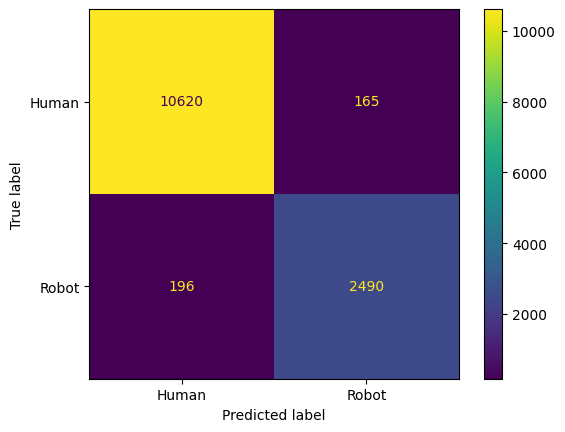

In [43]:
ada_clf_scaled = AdaBoostClassifier(
    DecisionTreeClassifier(), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)

pipeline = Pipeline([
    ('scaler', scaler),
    ('ada_clf_scaled', ada_clf_scaled),
])

pipeline.fit(X_train, y_train)

y_pred_pipeline = pipeline.predict(X_test)

print(f"{accuracy_score(y_test, y_pred_pipeline)}\n")

print(classification_report(y_test, y_pred_pipeline))

cm = confusion_matrix(y_test, y_pred_pipeline)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Human', 'Robot'])
disp.plot()

0.9743151956053745

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     10785
           1       0.94      0.93      0.94      2686

    accuracy                           0.97     13471
   macro avg       0.96      0.96      0.96     13471
weighted avg       0.97      0.97      0.97     13471



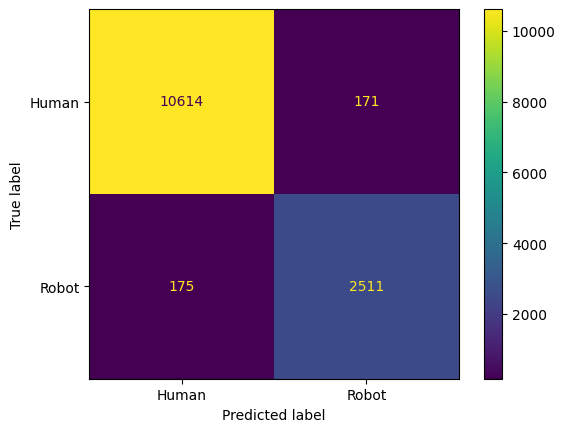

In [44]:
gbrt_best_scaled = GradientBoostingClassifier(max_depth=18, n_estimators=best_n_estimators, learning_rate=0.1, random_state=42)

pipeline = Pipeline([
    ('scaler', scaler),
    ('gbrt_best_scaled', gbrt_best_scaled),
])

pipeline.fit(X_train, y_train)

y_pred_pipeline = pipeline.predict(X_test)

print(f"{accuracy_score(y_test, y_pred_pipeline)}\n")

print(classification_report(y_test, y_pred_pipeline))

cm = confusion_matrix(y_test, y_pred_pipeline)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Human', 'Robot'])
disp.plot()

0.9760968005344814

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     10785
           1       0.93      0.95      0.94      2686

    accuracy                           0.98     13471
   macro avg       0.96      0.97      0.96     13471
weighted avg       0.98      0.98      0.98     13471



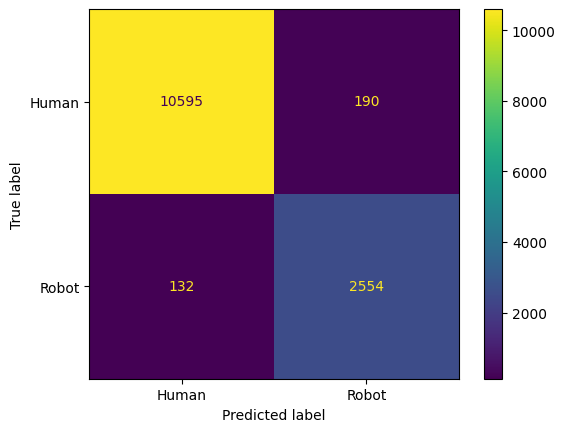

In [45]:
rf_clf_scaled = RandomForestClassifier(random_state=42)

pipeline = Pipeline([
    ('scaler', scaler),
    ('rf_clf_scaled', GridSearchCV(rf_clf_scaled, param_grid=[param_grid1, param_grid2, param_grid3], cv=5, n_jobs=-1)),
])

pipeline.fit(X_train, y_train)

y_pred_pipeline = pipeline.predict(X_test)

print(f"{accuracy_score(y_test, y_pred_pipeline)}\n")

print(classification_report(y_test, y_pred_pipeline))

cm = confusion_matrix(y_test, y_pred_pipeline)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Human', 'Robot'])
disp.plot()

Conclusie --> scaling heeft de resultaten slechter gemaakt

### Models opslaan

In [46]:
filename = './new_models/decision_tree_classifier.sav'
pickle.dump(dt_clf, open(filename, 'wb'))

filename2 = './new_models/bagging_classifier_oob.sav'
pickle.dump(bag_clf, open(filename2, 'wb'))

filename3 = './new_models/adaboost_classifier.sav'
pickle.dump(ada_clf, open(filename3, 'wb'))

filename4 = './new_models/gradient_boosting_classifier.sav'
pickle.dump(gbrt_best, open(filename4, 'wb'))

filename5 = './new_models/random_forest_classifier.sav'
pickle.dump(rf_clf, open(filename5, 'wb'))